# 1 - Perkenalan

Nama Peneliti:Suma Bimantoro Andru

Dataset: credit_card_default

Objective:<b>model Classification untuk memprediksi default_payment_next_month</b>

# 2 - Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# 3 - Data Loading

<h1>Query dari BQ</h1>
<p><b>select</b> limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month
<br><b>from</b> bigquery-public-data.ml_datasets.credit_card_default <br><b>limit 29835</b></p>

In [2]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase1/Milestsone1/dataset/h8dsft_P1M1_Suma_Bimantoro_Andru.csv')

In [4]:
#Tampilkan Head
data.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0


In [5]:
#Tampilkan Tail
data.tail(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Duplicate Dataset

data_copy = data.copy()

In [7]:
#tampilkan informasi untuk melihat field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

<p>Di dataset ini ada <b>24</b> columns dan <b>2965</b> row, tipe data semua <b>int</b></p>

In [8]:
#check dataset
data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


<p>Terlihat dari <b>median</b> bernilai <b>2</b>, yang artinya banyak <b>wanita</b> dari pada <b>laki-laki</b></p>

# 4 - Exploratory Data Analysis (EDA)

<h1><b>default_payment_next_month</b></h1>

In [9]:
#cek Feature
data['default_payment_next_month'].unique()

array([0, 1])

<p>Default payment (<b>1=yes, 0=no</b>)</p>

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

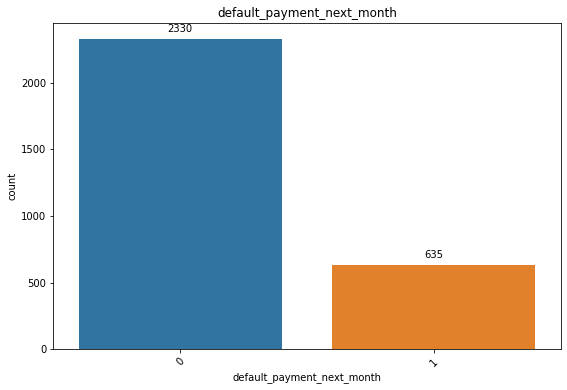

In [10]:
#membuat plot untuk cek column payment
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
default_payment_next_month = sns.countplot(x='default_payment_next_month', data=data, order=data.default_payment_next_month.value_counts().index)
for p in default_payment_next_month.patches:
    default_payment_next_month.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('default_payment_next_month')
plt.xlabel('default_payment_next_month')
plt.ylabel('count')
plt.xticks(rotation=45)

In [11]:
#melihat jumlah dan persen terhadap column paymen
(data['default_payment_next_month'].value_counts()/data['default_payment_next_month'].count())*100

0    78.583474
1    21.416526
Name: default_payment_next_month, dtype: float64

<p><b>no</b> berjumlah <b>2330</b> dan <b>yes</b> berjumlah <b>635</b>,ada sekitar <b>78%</b> untuk user no dan <b>21%</b> untuk user <b>yes</b></p>

<h1><b>limit_balance</b></h1>

In [12]:
#cek column limit_balance
data['limit_balance'].sort_values()

1923     10000
1748     10000
2727     10000
1737     10000
288      10000
         ...  
375     680000
1102    700000
1447    750000
163     780000
2425    800000
Name: limit_balance, Length: 2965, dtype: int64

<p><b>Limit</b> yang paling kecil <b>10.000</b> dan paling besar <b>800.000</b>, <b>peneliti</b> melihat colomn <b>limit_balance</b> adalah limit <b>CC</b></p>

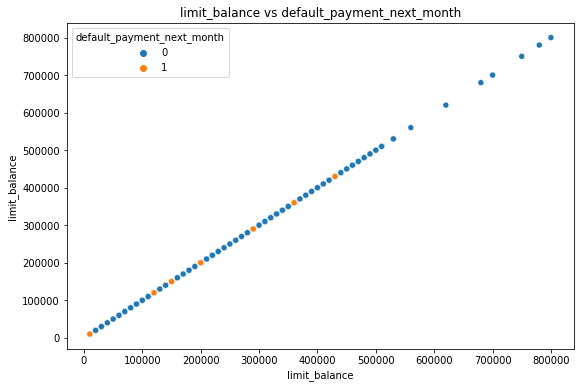

In [13]:
#membuat plot untuk melihat berhubungan feature dengan target
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='limit_balance', y='limit_balance', data=data, hue='default_payment_next_month')
plt.title('limit_balance vs default_payment_next_month')
plt.xlabel('limit_balance')
plt.ylabel('limit_balance')
plt.show()

<p>Makin besar <b>limit</b> terlihat makin sering <b>NO</b>, dan mulai dari <b>limit</b> <b>500.000</b> keatas user <b>NO</b> semua.terlihat ada pergerakan keatas perbedaan , feature ini akan dipakai nantinnya</p>

<h1><b>marital status,sex<b></h1>

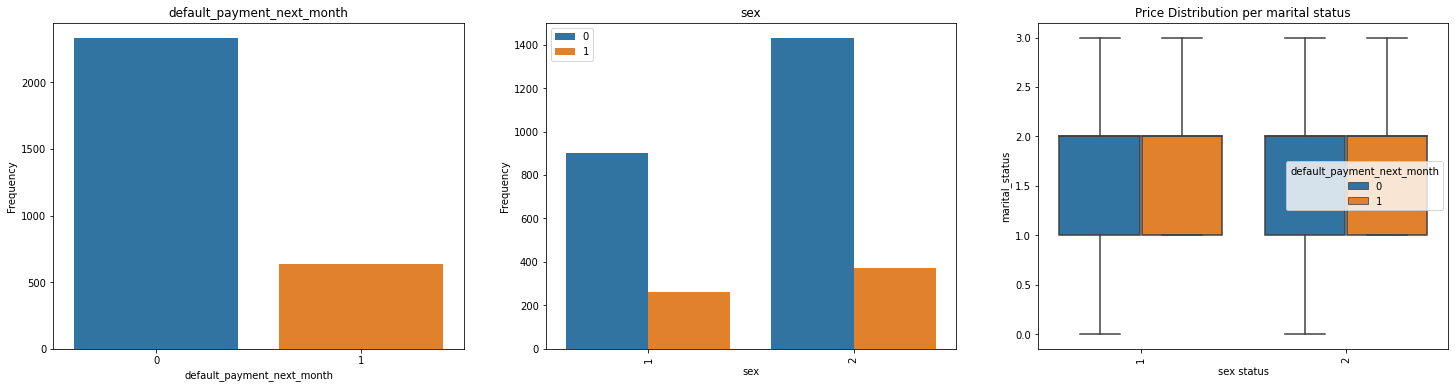

In [14]:
#Membuat Plot hubungan dengan default_payment_next_month
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.countplot(x='default_payment_next_month', data=data)
plt.title('default_payment_next_month')
plt.xlabel('default_payment_next_month')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.countplot(x='sex', data=data, hue='default_payment_next_month')
plt.title('sex')
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.subplot(1, 3, 3)
sns.boxplot(x='sex', y='marital_status', data=data, hue='default_payment_next_month')
plt.title('Price Distribution per marital status')
plt.xlabel('sex status')
plt.ylabel('marital_status')
plt.xticks(rotation=90)
plt.show()

<li>untuk <b>marital_status</b> dan <b>sex</b>, terlihat di visualisasi <b>boxplot</b> tidak ada pergerakan atau perbedaan dari <b>plot</b>, yang menandakan kecilnya korelasi antara <b>marital_status</b>,<b>sex</b> kepada <b>default_payment</b>

Note:<b>sex</b>(1=male, 2=female)<br>
Note:<b>Marital_status</b>(1=married, 2=single, 3=others)

<h1><b>education_level</b></h1>
<h1><b>Age</b></h1>

In [15]:
#cek dataset column
data['education_level'].unique()

array([1, 2, 3, 5, 4, 6, 0])

Note:<b>Education Level</b><br>1=graduate school,<br> 2=university,<br> 3=high school,<br> 4=others,<br> 5=unknown,<br> 6=unknown)

<p><b>Peneliti</b> Melihat untuk column <b>Education_level</b> adalah <b>pendidikan</b> terakhir dari <b>user</b></p>

In [16]:
#sortir column
data['age'].sort_values()

1341    21
909     21
1116    21
2916    21
1153    21
        ..
2110    67
1194    67
2030    68
219     69
617     69
Name: age, Length: 2965, dtype: int64

Text(0, 0.5, 'Frequency')

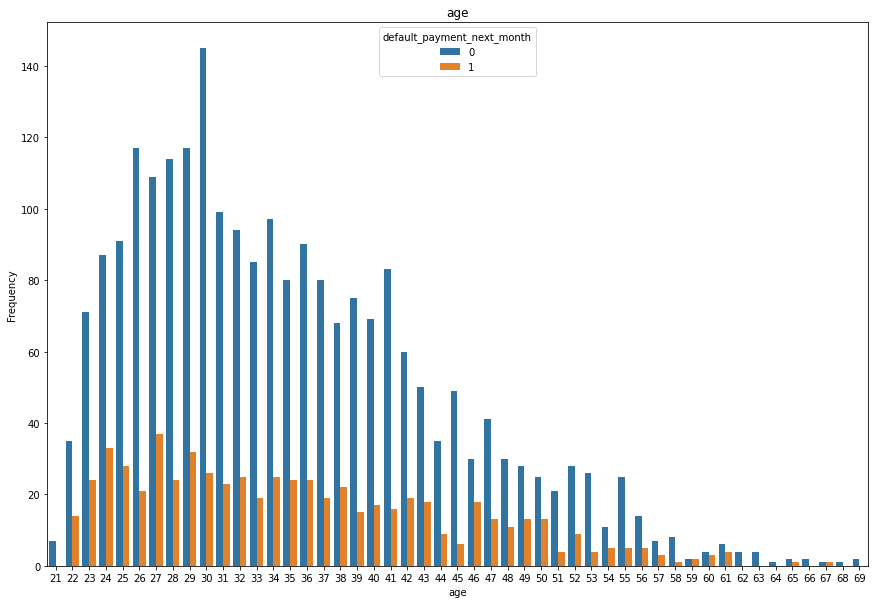

In [17]:
#membuat count plot
plt.figure(figsize=(50,10))
plt.subplot(1, 3, 1)
sns.countplot(x='age', data=data,hue='default_payment_next_month')
plt.title('age')
plt.xlabel('age')
plt.ylabel('Frequency')

<p>Dilihat dari <b>visualisasi</b> umur yang <b>lebih muda</b>, banyak yang <b>"no"</b></p>

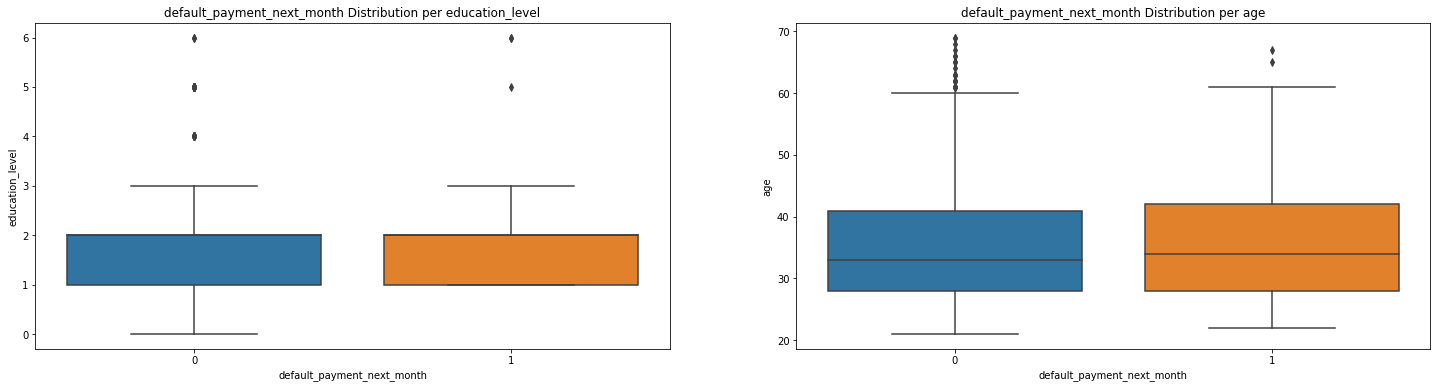

In [18]:
#Membuat Boxplot
plt.figure(figsize=(25,6))
plt.subplot(1, 2, 1)
sns.boxplot(x='default_payment_next_month', y='education_level', data=data)
plt.title('default_payment_next_month Distribution per education_level')
plt.xlabel('default_payment_next_month')
plt.ylabel('education_level')
plt.subplot(1, 2, 2)
sns.boxplot(x='default_payment_next_month', y='age', data=data)
plt.title('default_payment_next_month Distribution per age')
plt.xlabel('default_payment_next_month')
plt.ylabel('age')
plt.show()

Dari <b>boxplot</b> ini dapat diketahui bahwa <b>tidak ada hubungan linear</b> antara kolom <b>default_payment</b> dengan kolom <b>education_level</b> dan <b>age</b>, walaupun ada pergerakan sedikit di boxplot age.

<h1><b>pay_0 - pay_6</b></h1>

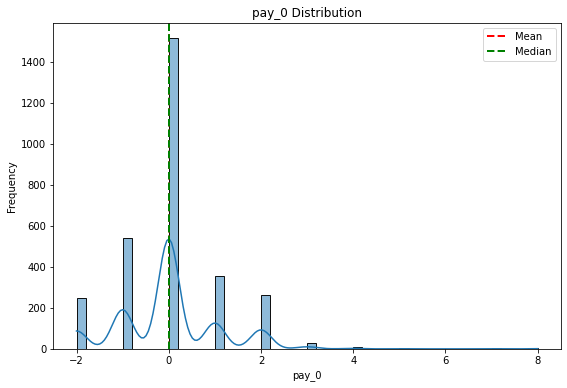

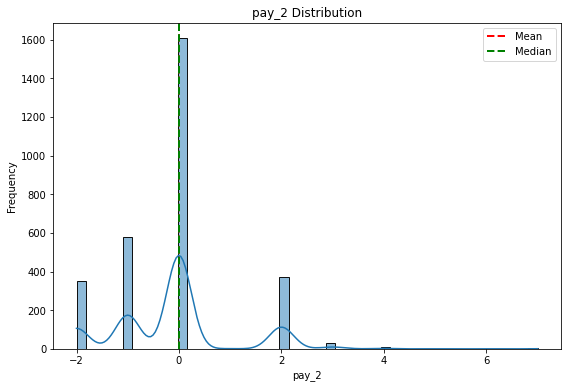

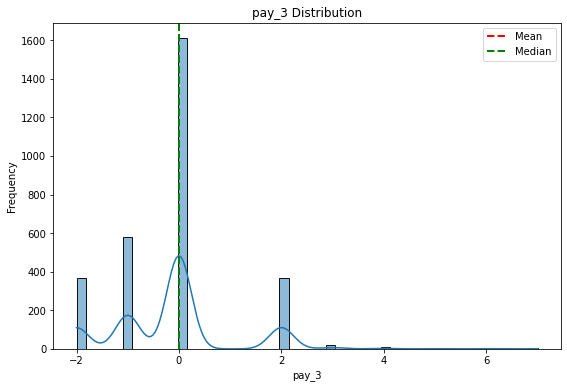

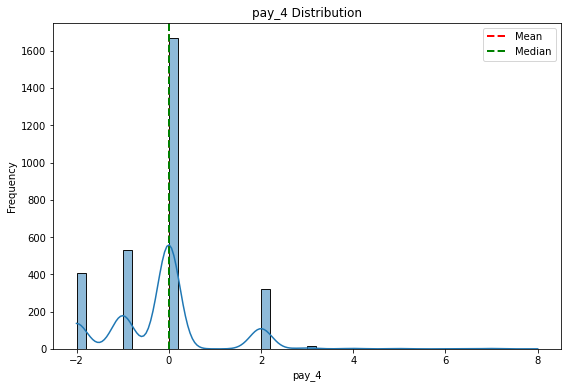

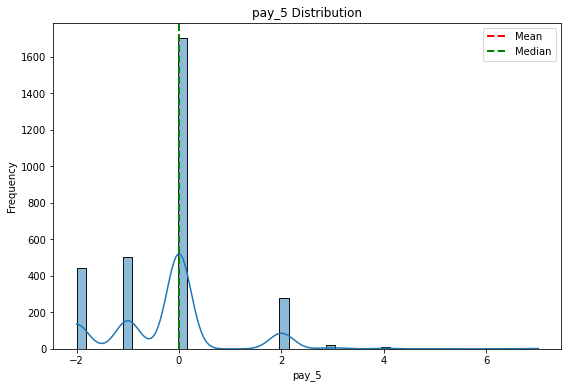

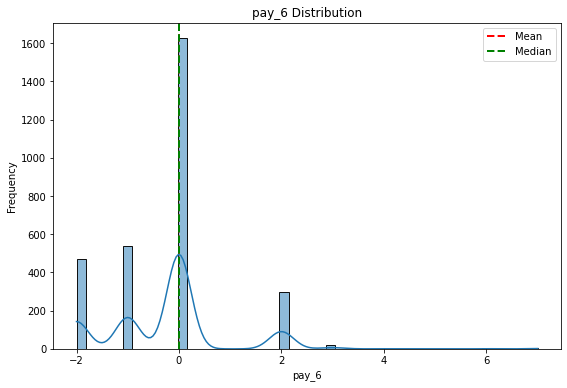

In [19]:
#membuat histogram
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pay_0', data=data, bins=50, kde=True)
plt.axvline(data.pay_0.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pay_0.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('pay_0 Distribution')
plt.xlabel('pay_0')
plt.ylabel('Frequency')
plt.legend()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pay_2', data=data, bins=50, kde=True)
plt.axvline(data.pay_0.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pay_0.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('pay_2 Distribution')
plt.xlabel('pay_2')
plt.ylabel('Frequency')
plt.legend()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pay_3', data=data, bins=50, kde=True)
plt.axvline(data.pay_0.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pay_0.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('pay_3 Distribution')
plt.xlabel('pay_3')
plt.ylabel('Frequency')
plt.legend()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pay_4', data=data, bins=50, kde=True)
plt.axvline(data.pay_0.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pay_0.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('pay_4 Distribution')
plt.xlabel('pay_4')
plt.ylabel('Frequency')
plt.legend()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pay_5', data=data, bins=50, kde=True)
plt.axvline(data.pay_0.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pay_0.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('pay_5 Distribution')
plt.xlabel('pay_5')
plt.ylabel('Frequency')
plt.legend()

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='pay_6', data=data, bins=50, kde=True)
plt.axvline(data.pay_0.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(data.pay_0.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('pay_6 Distribution')
plt.xlabel('pay_6')
plt.ylabel('Frequency')
plt.legend()

<p>untuk column <b>pay</b>, semua histogramnya ada pergerakan sedikit <b>dari pay0 - pay6</b>, <b>peneliti</b> memutuskan memakai salah 1 untuk visualisasi agar tau ada hubungan dengan <b>payment</b></p>

In [20]:
#cek isi kategori column pay_0
data['pay_0'].unique()

array([ 0, -1,  2,  1,  3, -2,  4,  5,  6,  7,  8])

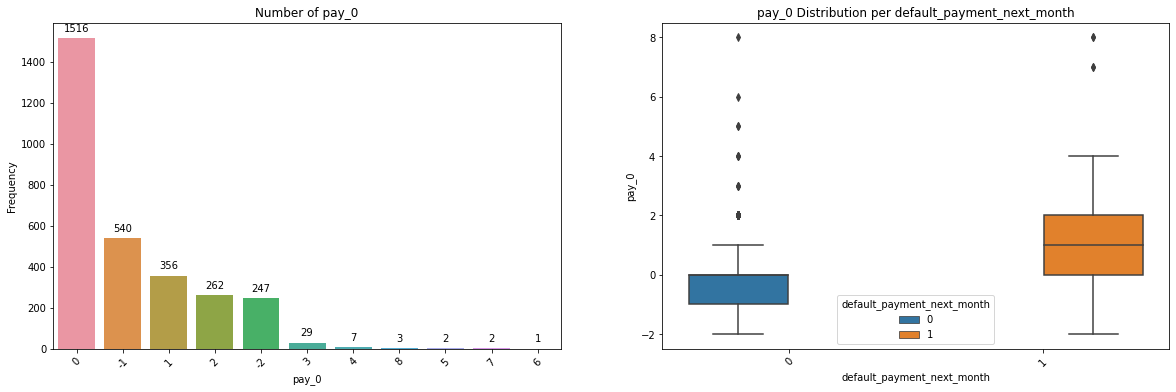

In [21]:
#membuat bar dan boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
te = sns.countplot(x='pay_0', data=data, order=data.pay_0.value_counts().index)
for p in te.patches:
    te.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Number of pay_0')
plt.xlabel('pay_0')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.boxplot(x='default_payment_next_month', y='pay_0', data=data, hue='default_payment_next_month')
plt.title('pay_0 Distribution per default_payment_next_month')
plt.xlabel('default_payment_next_month')
plt.ylabel('pay_0')
plt.xticks(rotation=45)
plt.show()

Note:<br>-1=pay duly,<br> 1=payment delay for one month,<br> 2=payment delay for two months<br> 8=payment delay for eight months,<br> 9=payment delay for nine months and above),<b><br>
terlihat ada 0 dan -2, peneliti menyimpulkan bahwa itu other 

<p>Dari box plot ini juga menunjukan bahwa <b>payment delay kurang dari 4  bulan banyak yang membayar</b>, tetapi lebih dari 4 bulan, costumer sudah tidak bayar, feature ini akan dipakai nantinya</p>

Note: <i>column Pay adalah pembayaran kembali</i>

<h1><b>bill_amt_1 - bill_amt_6</b></h1>

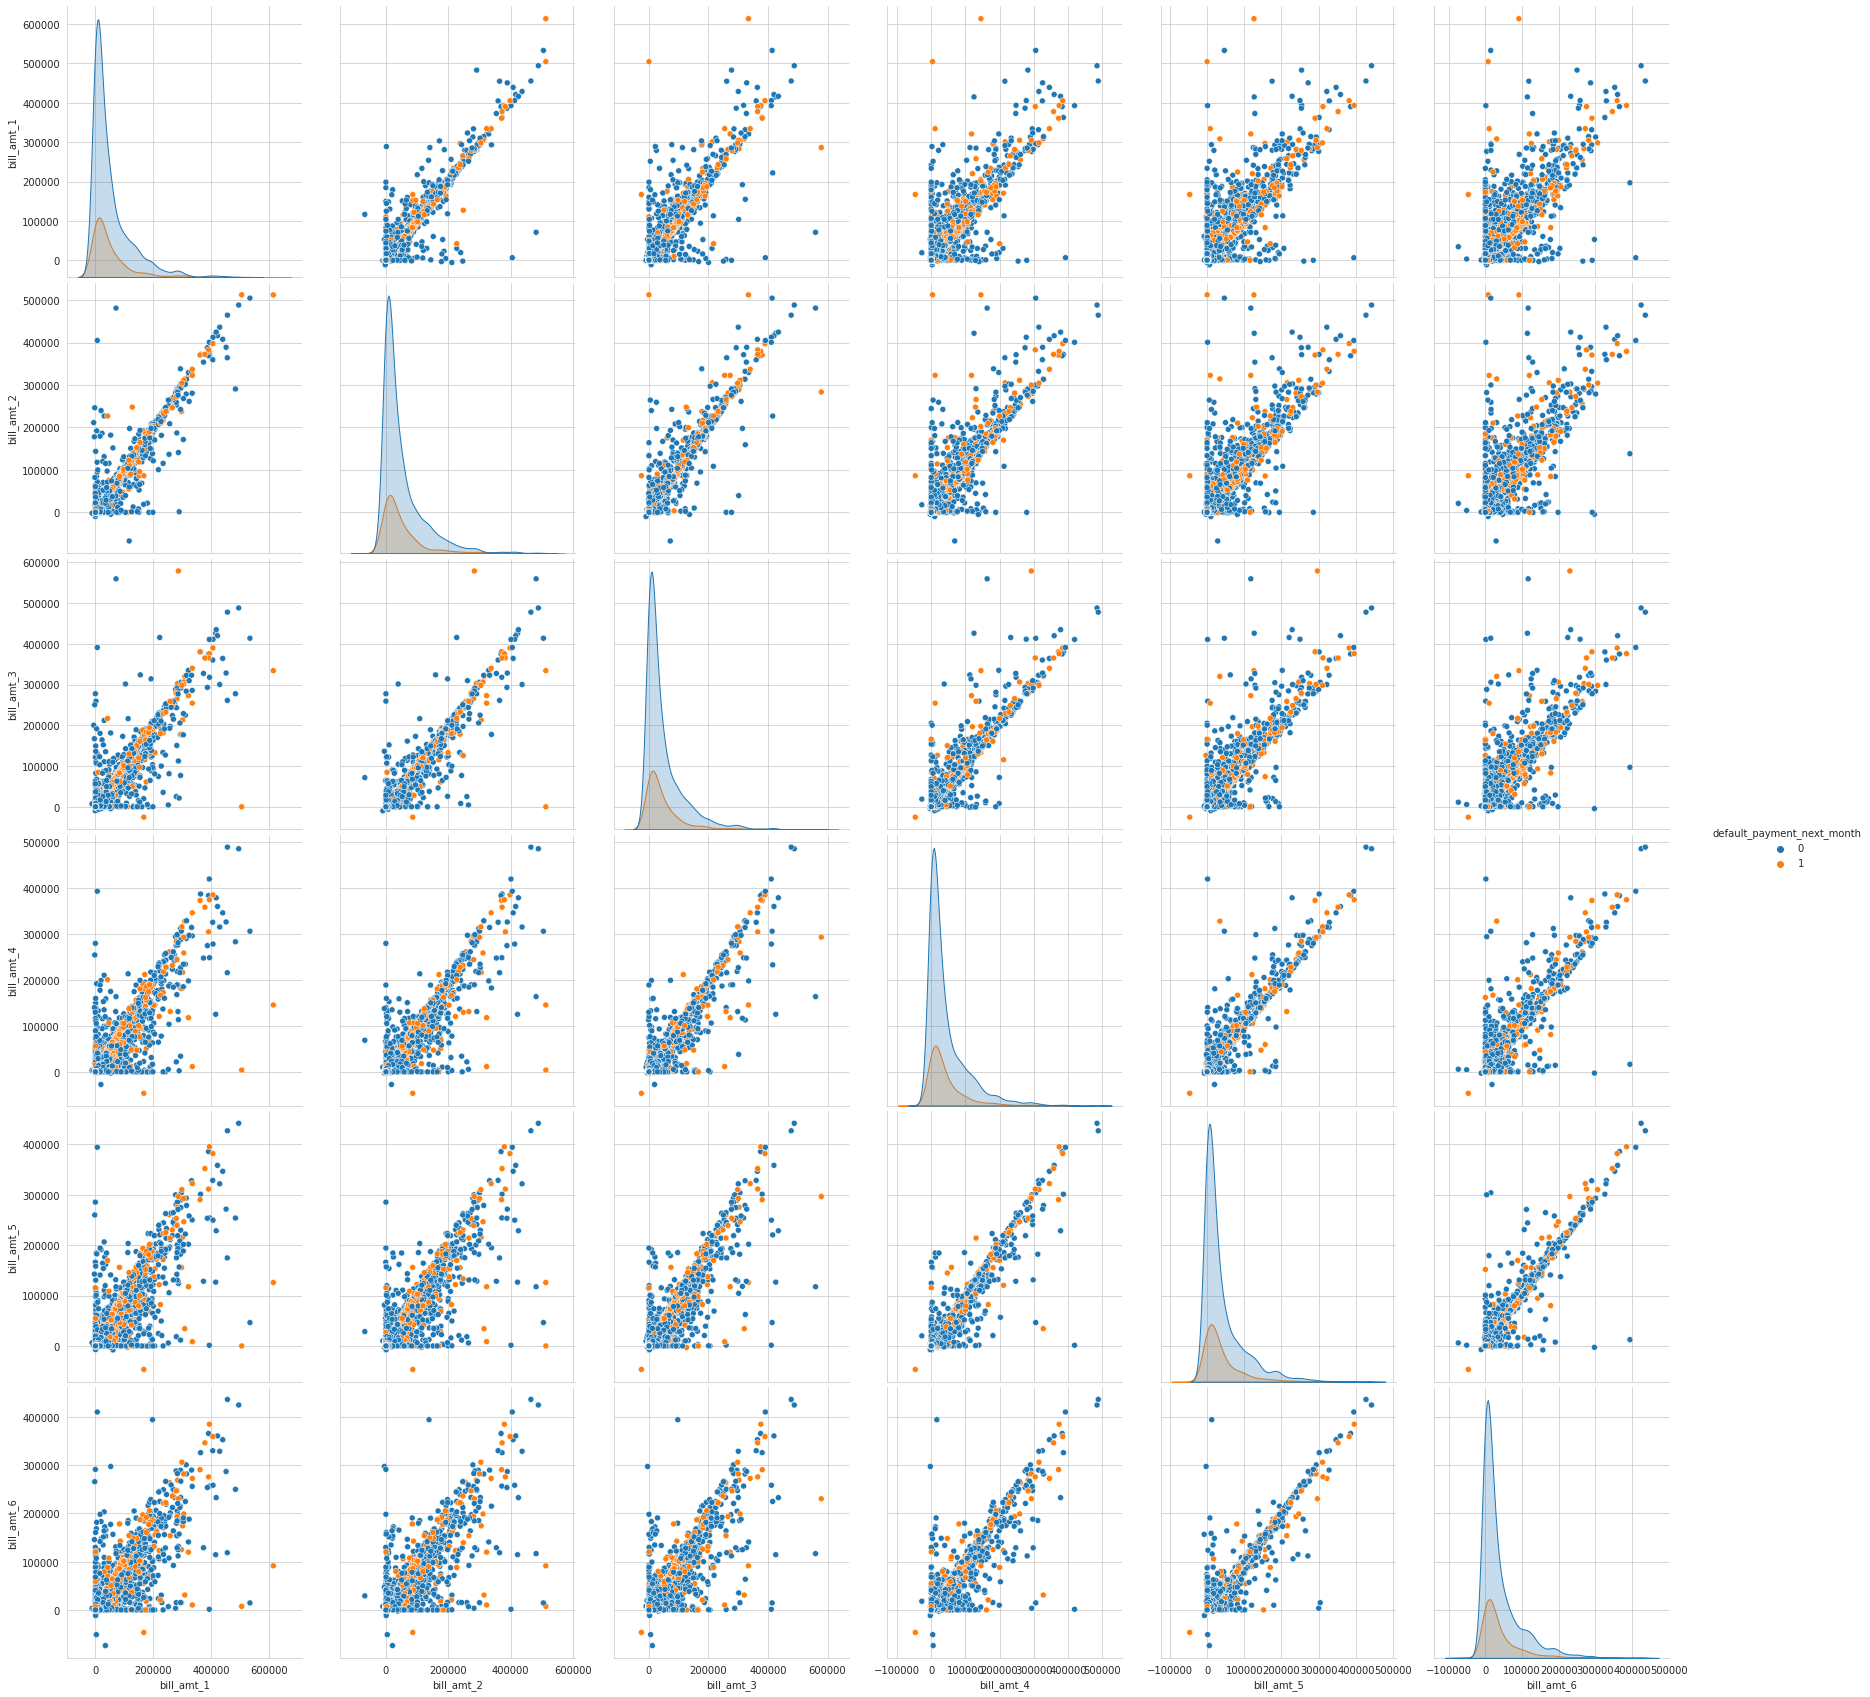

In [22]:
#membuat pairplot
sns.set_style("whitegrid");
sns.pairplot(data, hue="default_payment_next_month", vars = ["bill_amt_1", "bill_amt_2", "bill_amt_3","bill_amt_4","bill_amt_5","bill_amt_6"], height=4);
plt.show()

<p>untuk column <b>bill_amt</b>, semua pairplot sama <b>dari bill_amt1 - bill_amt6</b>, <b>peneliti</b> memutuskan memakai salah 1 untuk tau hubungan dengan <b>payment</b></p>

Note:<br><b>column bill adalah Amount of bill statement</b> 

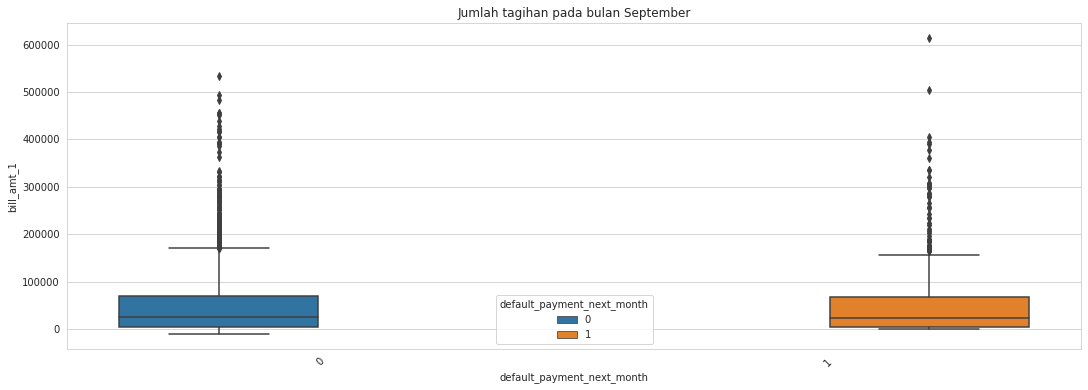

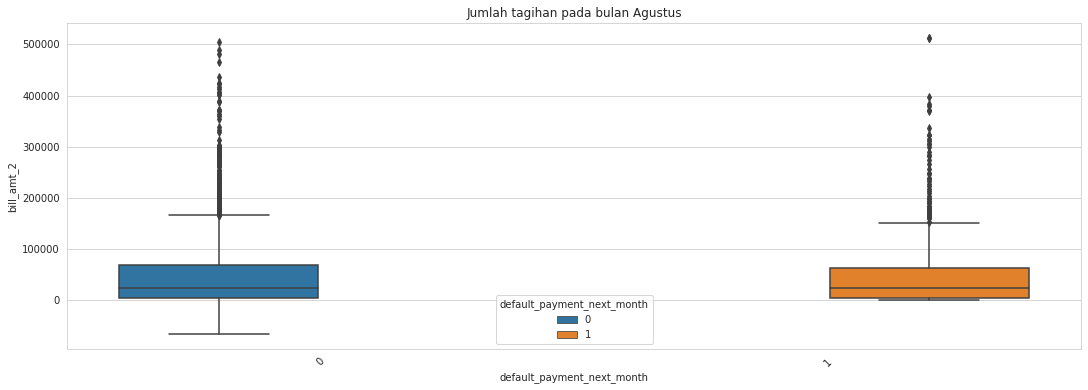

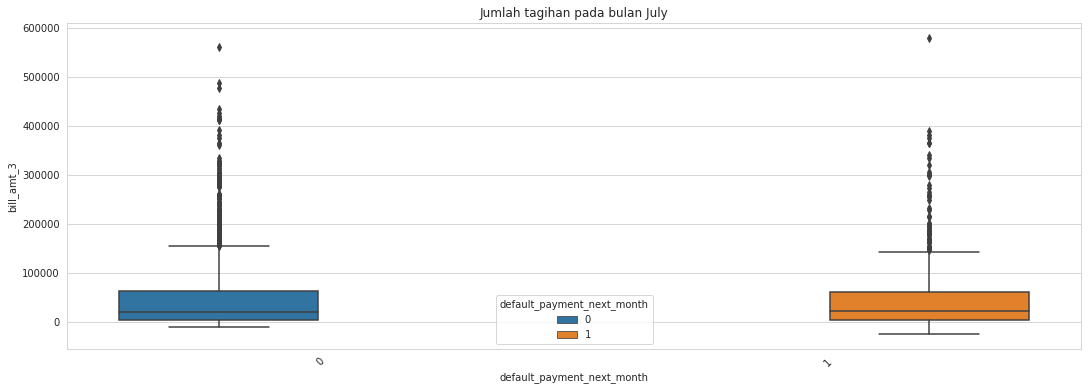

In [23]:
#membuat boxplot
plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='default_payment_next_month', y='bill_amt_1', data=data, hue='default_payment_next_month')
plt.title('Jumlah tagihan pada bulan September')
plt.xlabel('default_payment_next_month')
plt.ylabel('bill_amt_1')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='default_payment_next_month', y='bill_amt_2', data=data, hue='default_payment_next_month')
plt.title('Jumlah tagihan pada bulan Agustus')
plt.xlabel('default_payment_next_month')
plt.ylabel('bill_amt_2')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
sns.boxplot(x='default_payment_next_month', y='bill_amt_3', data=data, hue='default_payment_next_month')
plt.title('Jumlah tagihan pada bulan July')
plt.xlabel('default_payment_next_month')
plt.ylabel('bill_amt_3')
plt.xticks(rotation=45)
plt.show()



<p>dilihat dari <b>boxplot</b> tidak terlihat ada <b>pergerakan/perbedaan dari jumlah bill ke status bayar atau tidak bayar</b>, dan terlihat ada outlier</p>

<h1>pay_amt_1-pay_amt_6</h1>

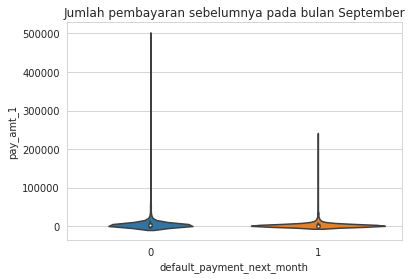

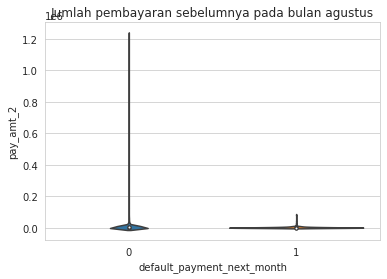

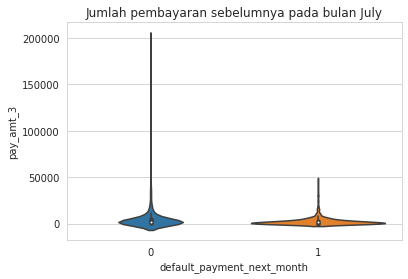

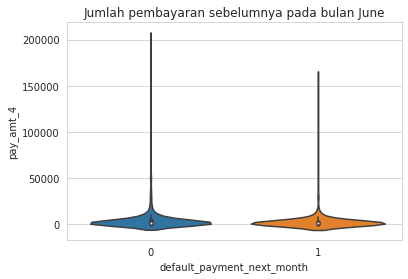

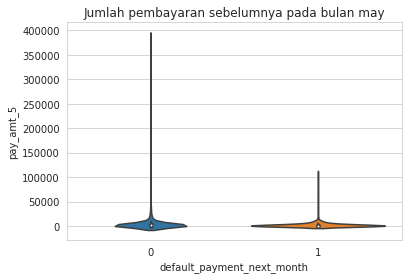

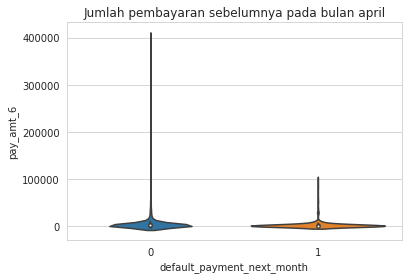

In [24]:
#Violin plot
sns.violinplot(x="default_payment_next_month", y="pay_amt_1", data=data, size=4)
plt.title("Jumlah pembayaran sebelumnya pada bulan September")
plt.show()

sns.violinplot(x="default_payment_next_month", y="pay_amt_2", data=data, size=4)
plt.title("Jumlah pembayaran sebelumnya pada bulan agustus")
plt.show()

sns.violinplot(x="default_payment_next_month", y="pay_amt_3", data=data, size=4)
plt.title("Jumlah pembayaran sebelumnya pada bulan July")
plt.show()

sns.violinplot(x="default_payment_next_month", y="pay_amt_4", data=data, size=4)
plt.title("Jumlah pembayaran sebelumnya pada bulan June")
plt.show()

sns.violinplot(x="default_payment_next_month", y="pay_amt_5", data=data, size=4)
plt.title("Jumlah pembayaran sebelumnya pada bulan may")
plt.show()

sns.violinplot(x="default_payment_next_month", y="pay_amt_6", data=data, size=4)
plt.title("Jumlah pembayaran sebelumnya pada bulan april")
plt.show()

<p>Terlihat jumlah pembayaran dari april sampai september, dari april sampai agustus yang tidak bayar menurun, dan di bulan september meningkat drastis jumlah pembayarannya, dan ini<b> membuktikan ada korelasi antara column dan payment</b></p>

<h1><b>C-MAP</b></h1>

In [25]:
#melihat corelasi dengan c-map
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

#Correlation Between Numeric Columns
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
limit_balance,1.000000,0.028560,-0.220874,-0.117909,0.130805,-0.223497,-0.281057,-0.275726,-0.245538,-0.236102,-0.226140,0.300388,0.301188,0.305646,0.308918,0.309346,0.306496,0.171902,0.169361,0.242904,0.210302,0.200632,0.224960,-0.161909
sex,0.028560,1.000000,-0.016816,-0.011742,-0.127359,-0.078188,-0.104959,-0.098495,-0.072319,-0.053660,-0.043291,-0.067615,-0.058139,-0.045150,-0.033684,-0.032004,-0.035632,0.019311,0.014299,0.019432,-0.001635,-0.019963,-0.002479,-0.021765
education_level,-0.220874,-0.016816,1.000000,-0.135548,0.197189,0.089191,0.099282,0.105426,0.101337,0.096330,0.069986,0.008189,0.002172,-0.000919,-0.017839,-0.024139,-0.021942,-0.030440,-0.027683,-0.035931,-0.013496,-0.037795,-0.040558,0.044926
marital_status,-0.117909,-0.011742,-0.135548,1.000000,-0.400617,-0.000231,0.047172,0.037733,0.043507,0.047366,0.051295,-0.016926,-0.016148,-0.022133,-0.028957,-0.028412,-0.015740,-0.017355,-0.006396,-0.019958,-0.017476,-0.000289,-0.008024,-0.025998
age,0.130805,-0.127359,0.197189,-0.400617,1.000000,-0.009070,-0.061002,-0.048808,-0.061540,-0.069756,-0.055274,0.080546,0.071238,0.063405,0.050337,0.061422,0.057900,0.016988,0.009628,0.027720,0.058554,0.013403,0.010300,0.016905
pay_0,-0.223497,-0.078188,0.089191,-0.000231,-0.009070,1.000000,0.668640,0.560446,0.519716,0.493273,0.466796,0.200214,0.191016,0.184056,0.187317,0.185056,0.185651,-0.093121,-0.085982,-0.105665,-0.071562,-0.048355,-0.059863,0.356963
pay_2,-0.281057,-0.104959,0.099282,0.047172,-0.061002,0.668640,1.000000,0.765616,0.643265,0.605527,0.571933,0.248069,0.235818,0.227777,0.232091,0.228745,0.229091,-0.098743,-0.066226,-0.075787,-0.046495,-0.026198,-0.050794,0.288813
pay_3,-0.275726,-0.098495,0.105426,0.037733,-0.048808,0.560446,0.765616,1.000000,0.750440,0.676661,0.617316,0.216860,0.241912,0.229902,0.236443,0.236052,0.228902,-0.004377,-0.066426,-0.073095,-0.033320,-0.046254,-0.066192,0.275758
pay_4,-0.245538,-0.072319,0.101337,0.043507,-0.061540,0.519716,0.643265,0.750440,1.000000,0.823226,0.710399,0.200663,0.218286,0.240850,0.249524,0.252534,0.249842,-0.020703,-0.011330,-0.080911,-0.027776,-0.039732,-0.059409,0.255805
pay_5,-0.236102,-0.053660,0.096330,0.047366,-0.069756,0.493273,0.605527,0.676661,0.823226,1.000000,0.813437,0.191763,0.210235,0.231307,0.263476,0.267059,0.257019,-0.014592,-0.000027,0.002544,-0.060026,-0.045322,-0.042375,0.253319


<p>Setelah dilihat dari correlation , sama seperti visualisasi peneliti terhadap payment diatas pada saat pengenalan data, setelah dilihat ternyata <b>column pay_amt dan age ternyata memilik corelasi yang rendah walaupun ada korelasi di visual sedikit pergerakan</b>,
berikut feature nanti yang akan dipilih</p>
<li>limit_balance=-0.161909
<li>pay_0 =0.356963
<li>pay_2=0.288813
<li>pay_3=0.275758
<li>pay_4=0.255805
<li>pay_5=0.253319
<li>pay_6=0.237170

# 5 - Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get data for model inference

In [26]:
## Get data for model inference
data_inf = data.sample(20, random_state=17)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
91,420000,2,2,2,32,0,0,0,0,0,...,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
325,30000,2,2,2,25,2,0,0,0,0,...,12473,12623,27460,1200,1201,592,500,1500,0,1
47,40000,2,3,1,60,0,0,0,0,0,...,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
1488,70000,2,3,3,39,0,0,-1,0,-1,...,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
446,60000,2,2,2,24,-1,0,-1,0,0,...,10213,10000,11832,1020,9479,1000,200,1832,5889,0
567,300000,2,1,1,30,0,0,0,0,0,...,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
1473,500000,1,1,2,43,0,0,0,-1,-1,...,3887,0,7413,22650,0,3887,0,7413,0,1
548,490000,2,2,1,30,0,0,0,0,0,...,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
1768,80000,1,1,2,26,1,2,2,0,0,...,40793,42990,42854,2000,0,1603,3000,2000,1056,0
1781,130000,2,2,1,34,2,2,2,2,2,...,32336,34186,34588,2500,3000,0,2600,1000,1500,1


In [27]:
# remove inference set from data set
data_train_test = data.drop(data_inf.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


In [28]:
#reset index to reduce error
data_train_test.reset_index(drop= True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000,2,2,2,32,0,0,0,0,0,...,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
1,30000,2,2,2,25,2,0,0,0,0,...,12473,12623,27460,1200,1201,592,500,1500,0,1
2,40000,2,3,1,60,0,0,0,0,0,...,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
3,70000,2,3,3,39,0,0,-1,0,-1,...,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
4,60000,2,2,2,24,-1,0,-1,0,0,...,10213,10000,11832,1020,9479,1000,200,1832,5889,0
5,300000,2,1,1,30,0,0,0,0,0,...,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
6,500000,1,1,2,43,0,0,0,-1,-1,...,3887,0,7413,22650,0,3887,0,7413,0,1
7,490000,2,2,1,30,0,0,0,0,0,...,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
8,80000,1,1,2,26,1,2,2,0,0,...,40793,42990,42854,2000,0,1603,3000,2000,1056,0
9,130000,2,2,1,34,2,2,2,2,2,...,32336,34186,34588,2500,3000,0,2600,1000,1500,1


## Splitting between `X` (Features) and `y` (Target)

In [29]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('default_payment_next_month', axis=1)
y = data_train_test['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,...,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,...,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,...,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,...,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,...,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2940,210000,2,2,1,39,-1,-1,-1,-1,-2,...,28428,0,0,12000,0,28428,0,0,12000,33664
2941,280000,2,1,1,41,2,-1,-1,-1,-2,...,486,0,0,244,6859,486,0,0,244,0
2942,80000,1,1,2,28,1,-1,-1,-1,-2,...,207,0,0,0,47,207,0,0,0,0
2943,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,0,6753,2920,0,0,0,6753,0


In [30]:
# Split between Train-Set and Test-Set 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2356, 23)
Test Size  :  (589, 23)


## Handling outliers

In [31]:
#membuat fungsi IQR untuk deteksi outlier, dipakai jika data itu skew
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [32]:
#membuat fungsi untuk deteksi outlier, dipakai jika data itu tidak skew atau distribusi normal
def find_normal_boundaries(X_train, variable):
    upper_boundary = X_train[variable].mean() + 3 * X_train[variable].std()
    lower_boundary = X_train[variable].mean() - 3 * X_train[variable].std()

    return upper_boundary, lower_boundary

<b><h1>limit_balance</h1></b>

In [33]:
#Cek Skew
data['limit_balance'].skew()

1.0004416437793329

data <b>skew</b> karena lebih dari 0,5

In [34]:
# calculate boundaries for limit_balance IQR
upper_boundary_limit_balance, lower_boundary_limit_balance = find_skewed_boundaries(X_train,'limit_balance',1.5)
upper_boundary_limit_balance, lower_boundary_limit_balance

(506250.0, -223750.0)

Karena data <b>skew</b>,peneliti memakai IQR untuk mencari upper dan lower

In [35]:
#melihat jumlah dan persentasi Limit_balance
print(upper_boundary_limit_balance, lower_boundary_limit_balance)
print('limit_balance : {}'.format(len(X_train)))
print('limit_balance bigger than 506250   : {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary_limit_balance])))
print('')
print('limit_balance bigger than 506250: {}'.format(len(X_train[X_train['limit_balance'] > upper_boundary_limit_balance])/len(X_train) * 100))

506250.0 -223750.0
limit_balance : 2356
limit_balance bigger than 506250   : 12

limit_balance bigger than 506250: 0.5093378607809848


Ada <b>12</b> data Upper, dan <b>0,5%</b> dari banyaknya data di column <b>limit_balance</b>

<b><h1>pay_0</h1></b>

In [36]:
#Cek Skew
data['pay_0'].skew()

0.9267902583584399

data <b>skew</b> karena lebih dari 0,5

In [37]:
# calculate boundaries for limit_balance IQR
upper_boundary_pay_0, lower_boundary_pay_0 = find_skewed_boundaries(X_train,'pay_0',1.5)
upper_boundary_pay_0, lower_boundary_pay_0

(1.5, -2.5)

Karena data <b>skew</b>,peneliti memakai IQR untuk mencari upper dan lower

In [38]:
#melihat jumlah dan persentasi pay_0
print(upper_boundary_pay_0, lower_boundary_pay_0)
print('pay_0 : {}'.format(len(X_train)))
print('pay_0 bigger than 1.5   : {}'.format(len(X_train[X_train['pay_0'] > upper_boundary_pay_0])))
print('')
print('pay_0 bigger than 1.5: {}'.format(len(X_train[X_train['pay_0'] > upper_boundary_pay_0])/len(X_train) * 100))

1.5 -2.5
pay_0 : 2356
pay_0 bigger than 1.5   : 249

pay_0 bigger than 1.5: 10.568760611205432


Ada <b>249</b> data terdeteksi <b>outlier dan sekitar 10.5%</b> dari banyaknya data

<b><h1>pay_2<h1></b>

In [39]:
#Cek Skew
data['pay_2'].skew()

0.8617619900976448

data <b>skew</b> karena lebih dari 0,5

In [40]:
# calculate boundaries for limit_balance IQR
upper_boundary_pay_2, lower_boundary_pay_2 = find_skewed_boundaries(X_train,'pay_2',1.5)
upper_boundary_pay_2, lower_boundary_pay_2

(1.5, -2.5)

Karena data <b>skew</b>,peneliti memakai IQR untuk mencari upper dan lower

In [41]:
#melihat jumlah dan persentasi pay_2
print(upper_boundary_pay_2, lower_boundary_pay_2)
print('pay_2 : {}'.format(len(X_train)))
print('pay_2 bigger than 1.5   : {}'.format(len(X_train[X_train['pay_2'] > upper_boundary_pay_2])))
print('')
print('pay_2 bigger than 1.5: {}'.format(len(X_train[X_train['pay_2'] > upper_boundary_pay_2])/len(X_train) * 100))

1.5 -2.5
pay_2 : 2356
pay_2 bigger than 1.5   : 338

pay_2 bigger than 1.5: 14.34634974533107


Ada <b>338</b> data terdeteksi <b>outlier dan sekitar 14.3%</b> dari banyaknya data

<b><h1>pay_3</h1></b>

In [42]:
#Cek Skew
data['pay_3'].skew()

0.9314601048899668

data <b>skew</b> karena lebih dari 0,5

In [43]:
# calculate boundaries for limit_balance IQR
upper_boundary_pay_3, lower_boundary_pay_3 = find_skewed_boundaries(X_train,'pay_3',1.5)
upper_boundary_pay_3, lower_boundary_pay_3

(1.5, -2.5)

In [44]:
#melihat jumlah dan persentasi pay_3
print(upper_boundary_pay_3, lower_boundary_pay_3)
print('pay_3 : {}'.format(len(X_train)))
print('pay_3 bigger than 1.5   : {}'.format(len(X_train[X_train['pay_3'] > upper_boundary_pay_3])))
print('')
print('pay_3 bigger than 1.5: {}'.format(len(X_train[X_train['pay_3'] > upper_boundary_pay_3])/len(X_train) * 100))

1.5 -2.5
pay_3 : 2356
pay_3 bigger than 1.5   : 331

pay_3 bigger than 1.5: 14.049235993208828


Ada <b>331</b> data terdeteksi <b>outlier dan sekitar 14%</b> dari banyaknya data

<b><h1>pay_4</h1></b>

In [45]:
#Cek Skew
data['pay_4'].skew()

1.1015042414613139

data <b>skew</b> karena lebih dari 0,5

In [46]:
# calculate boundaries for limit_balance IQR
upper_boundary_pay_4, lower_boundary_pay_4 = find_skewed_boundaries(X_train,'pay_4',1.5)
upper_boundary_pay_4, lower_boundary_pay_4

(1.5, -2.5)

In [47]:
#melihat jumlah dan persentasi pay_4
print(upper_boundary_pay_4, lower_boundary_pay_4)
print('pay_4 : {}'.format(len(X_train)))
print('pay_4 bigger than 1.5   : {}'.format(len(X_train[X_train['pay_4'] > upper_boundary_pay_4])))
print('')
print('pay_4 bigger than 1.5: {}'.format(len(X_train[X_train['pay_4'] > upper_boundary_pay_4])/len(X_train) * 100))

1.5 -2.5
pay_4 : 2356
pay_4 bigger than 1.5   : 295

pay_4 bigger than 1.5: 12.521222410865873


Ada <b>295</b> data terdeteksi <b>outlier dan sekitar 12.5%</b> dari banyaknya data

<b><h1>pay_5</h1></b>

In [48]:
#Cek Skew
data['pay_5'].skew()

1.0601731604244324

data <b>skew</b> karena lebih dari 0,5

In [49]:
# calculate boundaries for limit_balance IQR
upper_boundary_pay_5, lower_boundary_pay_5 = find_skewed_boundaries(X_train,'pay_5',1.5)
upper_boundary_pay_5, lower_boundary_pay_5

(1.5, -2.5)

In [50]:
#melihat jumlah dan persentasi pay_5
print(upper_boundary_pay_5, lower_boundary_pay_5)
print('pay_5 : {}'.format(len(X_train)))
print('pay_5 bigger than 1.5   : {}'.format(len(X_train[X_train['pay_5'] > upper_boundary_pay_5])))
print('')
print('pay_5 bigger than 1.5: {}'.format(len(X_train[X_train['pay_5'] > upper_boundary_pay_5])/len(X_train) * 100))

1.5 -2.5
pay_5 : 2356
pay_5 bigger than 1.5   : 262

pay_5 bigger than 1.5: 11.120543293718166


Ada <b>262</b> data terdeteksi <b>outlier dan sekitar 11.1%</b> dari banyaknya data

<b><h1>pay_6</h1></b>

In [51]:
#Cek Skew
data['pay_6'].skew()

0.9787600904116273

data <b>skew</b> karena lebih dari 0,5

In [52]:
# calculate boundaries for limit_balance IQR
upper_boundary_pay_6, lower_boundary_pay_6 = find_skewed_boundaries(X_train,'pay_6',1.5)
upper_boundary_pay_6, lower_boundary_pay_6

(1.5, -2.5)

In [53]:
#melihat jumlah dan persentasi pay_6
print(upper_boundary_pay_6, lower_boundary_pay_6)
print('pay_6 : {}'.format(len(X_train)))
print('pay_6 bigger than 1.5   : {}'.format(len(X_train[X_train['pay_6'] > upper_boundary_pay_6])))
print('')
print('pay_6 bigger than 1.5: {}'.format(len(X_train[X_train['pay_6'] > upper_boundary_pay_6])/len(X_train) * 100))

1.5 -2.5
pay_6 : 2356
pay_6 bigger than 1.5   : 270

pay_6 bigger than 1.5: 11.460101867572156


Ada <b>270</b> data terdeteksi <b>outlier dan sekitar 11.4%</b> dari banyaknya data

<b><h1>Setelah peneliti lihat untuk status upper adalah status costumer telat bayar di columns pay0-pay6, untuk colomns limit balance adalah limit CC costumer dan data itu masih bersifat valid, jadi peneliti tidak akan trimm ataupun censoring dari outlier</h1></b>

## Handling missing Value

In [54]:
# Check Missing Values in `X_train`
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [55]:
# Check Missing Values in `X_test`

X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [56]:
# Check Missing Values in `y_train`

y_train.isnull().sum()

0

In [57]:
# Check Missing Values in `y_test`

y_test.isna().sum()

0

<b><h1>Tidak ada missing value di X ataupun y</h1></b>

## Feature Selection

In [58]:
#display Xtrain
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
487,20000,1,2,2,41,0,0,0,-1,0,...,14450,8796,5419,2377,1301,1000,8796,108,2377,15742
263,170000,2,1,2,29,0,0,0,0,0,...,28592,29364,29096,29353,3000,3000,2000,1000,977,5000
723,90000,2,2,2,24,-1,0,0,0,0,...,23270,27372,31905,34954,5000,5000,5000,5000,3600,2000
2234,240000,2,1,1,38,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2245,300000,1,2,2,26,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,230000,1,3,2,24,0,0,0,0,2,...,70854,74413,72447,73418,4000,3500,6000,0,3000,2800
406,100000,1,2,2,28,0,0,0,0,0,...,64653,10388,3762,1434,5003,3018,1400,3786,1774,12714
1414,60000,2,2,2,23,0,0,0,2,2,...,30586,30885,30268,30103,1500,2867,1080,0,1319,2200
2191,310000,1,1,2,38,-2,-2,-2,-2,-2,...,993,993,1495,995,993,1005,1000,1502,1000,1000


In [59]:
# membuat df bedasarkan Feature selection

X_train_new=X_train[['limit_balance','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']]
X_test_new=X_test[['limit_balance','pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']]
X_train_new

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
487,20000,0,0,0,-1,0,-1
263,170000,0,0,0,0,0,0
723,90000,-1,0,0,0,0,0
2234,240000,-2,-2,-2,-2,-2,-2
2245,300000,-2,-2,-2,-2,-2,-2
...,...,...,...,...,...,...,...
1337,230000,0,0,0,0,2,0
406,100000,0,0,0,0,0,-2
1414,60000,0,0,0,2,2,0
2191,310000,-2,-2,-2,-2,-2,-2


## Split between Numerical Columns and Categorical Columns

In [60]:
# Get Numerical Columns and Categorical Columns

num_cols = ['limit_balance']
cat_cols = ['pay_0', 'pay_2', 'pay_3','pay_4','pay_5','pay_6']

#define variable train,tes ke cat dan num
X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]

print('Numerical Columns   : ', num_cols)
print('Categorical Columns : ', cat_cols)

Numerical Columns   :  ['limit_balance']
Categorical Columns :  ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


<p>Peneliti mendifind variable untuk numerik dan kategori</p>

## Feature Scaling

<p>Peneliti memakai scaling minmax karena feature <b>skew</b></p>

In [61]:
#scaling
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.01265823],
       [0.20253165],
       [0.10126582],
       ...,
       [0.06329114],
       [0.37974684],
       [0.24050633]])

## Feature Encoding

Tidak Melakukan proses Encoding karena data Feature bertipe numerik semua

## Concate between Numerical Columns and Categorical Columns

In [62]:
# Concate Columns

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)
X_test_final

array([[ 0.12658228,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08860759,  0.        ,  0.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.08860759,  0.        ,  0.        , ..., -2.        ,
        -2.        , -2.        ],
       ...,
       [ 0.29113924, -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [ 0.15189873,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3164557 , -1.        , -1.        , ...,  0.        ,
         0.        ,  0.        ]])

# 6 - Model Definition

Disini akan melakukan dengan model
<li>Logistic Regression
<li>SVM
<li>Decision Tree
<li>Random Forest
<li>KNN
<li>Naive Bayes
<li>Gradient Boosting

In [63]:
#mendefinisikan model
lr= LogisticRegression()
SVC_model = SVC()
dtmod= DecisionTreeClassifier()
ranfor= RandomForestClassifier()
knmod= KNeighborsClassifier()
naivbay= GaussianNB()
gb_clf = GradientBoostingClassifier()






# 7 - Model Training

In [64]:
#Logistic Regression
%timeit lr.fit(X_train_final, y_train)

17.5 ms ± 851 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
#SVM
%timeit SVC_model.fit(X_train_final, y_train)

153 ms ± 815 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [66]:
#Decision Tree
%timeit dtmod.fit(X_train_final, y_train)

4.34 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [67]:
#Random Forest
%timeit ranfor.fit(X_train_final, y_train)

288 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
#KNN
%timeit knmod.fit(X_train_final, y_train)

2.44 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [69]:
#Naive Bayes
%timeit naivbay.fit(X_train_final, y_train)

1.08 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [70]:
#Gradient Boosting
%timeit gb_clf.fit(X_train_final, y_train)

192 ms ± 7.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 8 - Model Evaluation

##Logistic Regression

In [71]:
#Define variable untuk memakai Cross_val_score
scoreslr = cross_val_score(lr, X_train_final, y_train,cv=5)


In [72]:
#memakai method mean() untuk mencari mean
scoreslr.mean()

0.8306434200582965

In [73]:
#memakai method std() untuk mencari std
scoreslr.std()

0.005808007839745754

##SVM

In [74]:
#Define variable untuk memakai Cross_val_score
scores_SVM = cross_val_score(SVC_model, X_train_final, y_train,cv=5)

In [75]:
#memakai method mean() untuk mencari mean
scores_SVM.mean()

0.8404071755010974

In [76]:
#memakai method std() untuk mencari std
scores_SVM.std()

0.007648250248338944

##Decision Tree

In [77]:
#Define variable untuk memakai Cross_val_score
scores_dectre = cross_val_score(dtmod, X_train_final, y_train,cv=5)

In [78]:
#memakai method mean() untuk mencari mean
scores_dectre.mean()

0.7894769513116702

In [79]:
#memakai method std() untuk mencari std
scores_dectre.std()

0.01159708502360862

##Random Forest

In [80]:
#Define variable untuk memakai Cross_val_score
scores_ranfor = cross_val_score(ranfor, X_train_final, y_train,cv=5)

In [81]:
#memakai method mean() untuk mencari mean
scores_ranfor.mean()

0.8111258051747093

In [82]:
#memakai method std() untuk mencari std
scores_ranfor.std()

0.010726267363337925

##KNN

In [83]:
#Define variable untuk memakai Cross_val_score
scores_knmod = cross_val_score(knmod, X_train_final, y_train,cv=5)

In [84]:
#melihat scoring dari 5 cv
scores_knmod

array([0.81779661, 0.81104034, 0.83864119, 0.82165605, 0.83864119])

In [85]:
#memakai method mean() untuk mencari mean
scores_knmod.mean()

0.8255550757493972

In [86]:
#memakai method std() untuk mencari std
scores_knmod.std()

0.011212193923633929

##Naive Bayes

In [87]:
#Define variable untuk memakai Cross_val_score
scores_naivbay = cross_val_score(naivbay, X_train_final, y_train,cv=5)

In [88]:
#memakai method mean() untuk mencari mean
scores_naivbay.mean()

0.8221562488754544

In [89]:
#memakai method std() untuk mencari std
scores_naivbay.std()

0.00311373865311359

##Gradient Boosting

In [90]:
#Define variable untuk memakai Cross_val_score
scores_gb_clf = cross_val_score(gb_clf, X_train_final, y_train,cv=5)

In [91]:
#memakai method mean() untuk mencari mean
scores_gb_clf.mean()

0.8353134333729173

In [92]:
#memakai method std() untuk mencari std
scores_gb_clf.std()

0.011606310216980118

<h1>setelah melakukan evaluasi dengan validation score peneliti akan menampilkan rekap di hasil scoring</h1>

##<b><h1>Hasil Scoring dan Pemilihan Algoritma</h1></b>


In [95]:
#define variable dan melakukan predict bagi data test dan data train
#LogisticRegression()
y_pred_train_lr = lr.predict(X_train_final)
y_pred_test_lr = lr.predict(X_test_final)

#SVC()
y_pred_train_SVC_model = SVC_model.predict(X_train_final)
y_pred_test_SVC_model = SVC_model.predict(X_test_final)

#DecisionTreeClassifier()
y_pred_train_dtmod = dtmod.predict(X_train_final)
y_pred_test_dtmod = dtmod.predict(X_test_final)

#RandomForestClassifier()
y_pred_train_ranfor = ranfor.predict(X_train_final)
y_pred_test_ranfor = ranfor.predict(X_test_final)

#KNeighborsClassifier()
y_pred_train_knmod = knmod.predict(X_train_final)
y_pred_test_knmod = knmod.predict(X_test_final)

#GaussianNB()
y_pred_train_naivbay = naivbay.predict(X_train_final)
y_pred_test_naivbay = naivbay.predict(X_test_final)

#GradientBoostingClassifier()
y_pred_train_gb_clf = gb_clf.predict(X_train_final)
y_pred_test_gb_clf = gb_clf.predict(X_test_final)

In [96]:
#Menampilkan acc_score di semua model algoritma yang sudah kita definisikan
print('-----TRAIN-----')
print('accuracy score train LogisticRegression : ',accuracy_score(y_train,y_pred_train_lr))
print('accuracy score train SVM : ',accuracy_score(y_train,y_pred_train_SVC_model))
print('accuracy score train DecisionTreeClassifier : ',accuracy_score(y_train,y_pred_train_dtmod))
print('accuracy score train RandomForestClassifier : ',accuracy_score(y_train,y_pred_train_ranfor))
print('accuracy score train KNN : ',accuracy_score(y_train,y_pred_train_knmod))
print('accuracy score train Naive Bayes : ',accuracy_score(y_train,y_pred_train_naivbay))
print('accuracy score train GradientBoostingClassifier : ',accuracy_score(y_train,y_pred_train_gb_clf))

print('-----TEST-----')
print('accuracy score train LogisticRegression : ',accuracy_score(y_test,y_pred_test_lr))
print('accuracy score train SVM : ',accuracy_score(y_test,y_pred_test_SVC_model))
print('accuracy score train DecisionTreeClassifier : ',accuracy_score(y_test,y_pred_test_dtmod))
print('accuracy score train RandomForestClassifier : ',accuracy_score(y_test,y_pred_test_ranfor))
print('accuracy score train KNN : ',accuracy_score(y_test,y_pred_test_knmod))
print('accuracy score train Naive Bayes : ',accuracy_score(y_test,y_pred_test_naivbay))
print('accuracy score train GradientBoostingClassifier : ',accuracy_score(y_test,y_pred_test_gb_clf))


-----TRAIN-----
accuracy score train LogisticRegression :  0.8361629881154499
accuracy score train SVM :  0.8531409168081494
accuracy score train DecisionTreeClassifier :  0.9206281833616299
accuracy score train RandomForestClassifier :  0.9206281833616299
accuracy score train KNN :  0.8548387096774194
accuracy score train Naive Bayes :  0.8230050933786078
accuracy score train GradientBoostingClassifier :  0.8646010186757216
-----TEST-----
accuracy score train LogisticRegression :  0.8115449915110357
accuracy score train SVM :  0.8098471986417657
accuracy score train DecisionTreeClassifier :  0.7877758913412564
accuracy score train RandomForestClassifier :  0.7928692699490663
accuracy score train KNN :  0.7894736842105263
accuracy score train Naive Bayes :  0.7860780984719864
accuracy score train GradientBoostingClassifier :  0.8098471986417657


akurasi lebih bagus di algoritma decission tree, dikarenakan peneliti diberi tugas mengevaluasi model dari hasil validasi score jadi peneliti akan lebih dalam evaluasi svm

In [97]:
#Menampilkan semua perhitungan validation score di semua model algoritma yang sudah kita definisikan 
print (f'Logistic Regression Mean :{scoreslr.mean()}')
print (f'Logistic Regression STD :{scoreslr.std()}')
print('')
print (f'Model SVM Mean :{scores_SVM.mean()}')
print (f'Model SVM STD :{scores_SVM.std()}')
print('')
print (f'Model Decision Tree Mean :{scores_dectre.mean()}')
print (f'Model Decision Tree STD :{scores_dectre.std()}')
print('')
print (f'Model Random Forest Mean :{scores_ranfor.mean()}')
print (f'Model Random Forest STD :{scores_ranfor.std()}')
print('')
print (f'Model KNN Mean :{scores_ranfor.mean()}')
print (f'Model KNN STD :{scores_ranfor.std()}')
print('')
print (f'Model Naive Bayes Mean :{scores_naivbay.mean()}')
print (f'Model Naive Bayes STD :{scores_naivbay.std()}')
print('')
print (f'Model Gradient Boosting Mean :{scores_gb_clf.mean()}')
print (f'Model Gradient Boosting STD :{scores_gb_clf.std()}')


Logistic Regression Mean :0.8306434200582965
Logistic Regression STD :0.005808007839745754

Model SVM Mean :0.8404071755010974
Model SVM STD :0.007648250248338944

Model Decision Tree Mean :0.7894769513116702
Model Decision Tree STD :0.01159708502360862

Model Random Forest Mean :0.8111258051747093
Model Random Forest STD :0.010726267363337925

Model KNN Mean :0.8111258051747093
Model KNN STD :0.010726267363337925

Model Naive Bayes Mean :0.8221562488754544
Model Naive Bayes STD :0.00311373865311359

Model Gradient Boosting Mean :0.8353134333729173
Model Gradient Boosting STD :0.011606310216980118


Jika dilihat algoritma SVM mendapatkan mean paling tinggi dengan hasil
<b>0.8404071755010974</b>

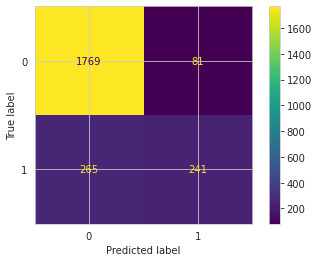

In [137]:
#y_train predict
cm = confusion_matrix(y_train, y_pred_train_SVC_model, labels=SVC_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVC_model.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_train meakukan kesalahan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,84
- pada tabel 0 data yang diprediksi bener adalah 1769 dan salah prediksi sebesar 81
- pada tabel 1 data yang diprediksi bener adalah 241 dan salah prediksi sebesar 265 (ada kemungkinan karena model imbalance)

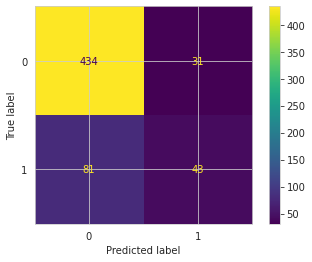

In [138]:
#y_test predict
cm = confusion_matrix(y_test, y_pred_test_SVC_model, labels=SVC_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVC_model.classes_)

disp.plot()
plt.show()

- Dari analisa diatas didapat bahwa y_test meakukan kesalhan prediksi dikarenakan accurasi scor kita masih berada pada angka 0,80
- pada tabel 0 data yang diprediksi bener adalah 434 dan salah prediksi sebesar 31
- pada tabel 1 data yang diprediksi bener adalah 43 dan salah prediksi sebesar 81

In [139]:
print(classification_report(y_train,y_pred_train_SVC_model))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1850
           1       0.75      0.48      0.58       506

    accuracy                           0.85      2356
   macro avg       0.81      0.72      0.75      2356
weighted avg       0.84      0.85      0.84      2356



pada y train : 
- precision untuk 0 yaitu 0.87(87%) yg artinya  berhasil meprediksi 87% status <b>no</b> dan 13% di salah meprediksi status tersebut 
- precision untuk 1 yaitu 0.75 yg artinya  berhasil meprediksi 75% status <b>yes</b> dan 25% salah meprediksi status tersebut 

- recall untuk 0 yaitu 0.96(96%) yg artinya  berhasil meprediksi 96% orang yang memiliki status <b>no</b> dan 4%  salah meprediksi status tersebut 
- recall untuk 1 yaitu 0.48 yg artinya  berhasil meprediksi 48% status <b>yes</b> dan 52% di salah meprediksi status tersebut 

- Kesalahan prediksi tersebut dapat mengakibat seseorang yang status <b>yes</b> malah mendapat status <b>no</b> dimana itu adalah sebuah kerugian
- kurang nya prediksi pada 1 itu disebabkan karena data yang imbalance oleh karena itu perlu dilakukan untuk improvement. Seperti pengurangan atau penambahan feature, atau mencoba dengan model/parameter lain.

##Hyperparameter Tuning

In [98]:
#define dari parameter yang ingin kita cari di gridsearch
param_grid = {'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['rbf','sigmoid','poly']}

In [ ]:
#define variable gridsearch
grid_search = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [100]:
#mencari parameter terbaik dengan grid search
grid_search.fit(X_train_final,y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.5s
[CV] END ........................C=0.1, gamma=1,

In [101]:
#define model setelah dapat param dari grid search
svm_tuning=grid_search.best_estimator_

In [102]:
#melihat isi parameter model
svm_tuning

SVC(C=1, gamma=0.1)

In [103]:
#validation score setelah model di tuning
scores_SVM_tuning = cross_val_score(svm_tuning, X_train_final, y_train,cv=5)

In [104]:
#melihat mean dari hasil validation model setelah di tuning
scores_SVM_tuning.mean()

0.839559717873979

In [105]:
#melihat std dari hasil validation model setelah di tuning
scores_SVM_tuning.std()

0.006630496148350046

In [106]:
#tampilan model dengan validation score sebelum dan setelah di tuning
print(f'score Mean model sebelum di tuning:{scores_SVM.mean()}')
print(f'score Mean model setelah di tuning:{scores_SVM_tuning.mean()}')

score Mean model sebelum di tuning:0.8404071755010974
score Mean model setelah di tuning:0.839559717873979


dari validation score setelah di tuning dengan grid search hasil jadi lebih kecil

In [107]:
#model tuning predict
y_pred_train_SVC_model_tuning = svm_tuning.predict(X_train_final)
y_pred_test_SVC_model_tuning = svm_tuning.predict(X_test_final)

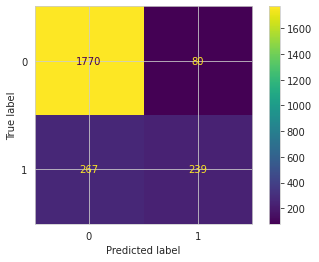

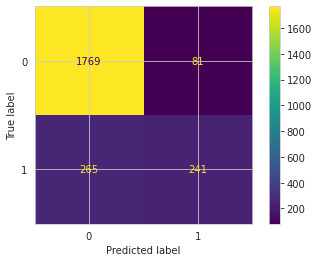

In [141]:
#y_train setelah tuning  predik
cm = confusion_matrix(y_train, y_pred_train_SVC_model_tuning, labels=svm_tuning.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_tuning.classes_)

disp.plot()
plt.show()

#y_train predict
cm = confusion_matrix(y_train, y_pred_train_SVC_model, labels=SVC_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVC_model.classes_)

disp.plot()
plt.show()

terlihat ada kemajuan setelah di tuning di hasil prediksi benar yang tadinnya sebelum di tuning 1769 dan setelah di tuning 1770

In [143]:
print('sebelum di tuning')
print(classification_report(y_train,y_pred_train_SVC_model))
print('')
print('setelah di tuning')
print(classification_report(y_train,y_pred_train_SVC_model_tuning))

sebelum di tuning
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1850
           1       0.75      0.48      0.58       506

    accuracy                           0.85      2356
   macro avg       0.81      0.72      0.75      2356
weighted avg       0.84      0.85      0.84      2356


setelah di tuning
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1850
           1       0.75      0.47      0.58       506

    accuracy                           0.85      2356
   macro avg       0.81      0.71      0.75      2356
weighted avg       0.84      0.85      0.84      2356



disemua hampir sama malahan jika dari hasil classification report untuk model setelah di tuning ada penurunan 1%  di recall

<b>note : Precision merupakan pengukuran kualitas seberapa bergunakah sistem pencarian tersebut, sedangkan Recall merupakan kualitas seberapa lengkap hasil relevan yang ditampilkan oleh sistem pencarian.</b>

In [108]:
#Tampilan predict model setelah di tuning dan sebelum di tuning
print('-----TRAIN-----')
print('accuracy score train SVM sebelum di tuning : ',accuracy_score(y_train,y_pred_train_SVC_model_tuning))
print('accuracy score train SVM setelah di tuning : ',accuracy_score(y_train,y_pred_train_SVC_model))
print('')
print('-----TEST-----')
print('accuracy score test SVM sebelum di tuning : ',accuracy_score(y_test,y_pred_test_SVC_model))
print('accuracy score test SVM setelah di tuning : ',accuracy_score(y_test,y_pred_test_SVC_model_tuning))

-----TRAIN-----
accuracy score train SVM sebelum di tuning :  0.8527164685908319
accuracy score train SVM setelah di tuning :  0.8531409168081494

-----TEST-----
accuracy score test SVM sebelum di tuning :  0.8098471986417657
accuracy score test SVM setelah di tuning :  0.8098471986417657


akurasi setelah di tuning menjadi lebih baik
dan akurasi tes sama saja

#9-Model Inference

In [109]:
#reset index data inference
data_inf = data_inf.reset_index(drop=True)
data_inf

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,420000,2,2,2,32,0,0,0,0,0,...,198925,175684,164037,7300,8839,8000,5900,6000,6000,0
1,30000,2,2,2,25,2,0,0,0,0,...,12473,12623,27460,1200,1201,592,500,1500,0,1
2,40000,2,3,1,60,0,0,0,0,0,...,21058,8204,9899,2000,3000,3000,6000,2000,2000,0
3,70000,2,3,3,39,0,0,-1,0,-1,...,15133,3148,4699,3000,11000,5000,3150,2000,4000,0
4,60000,2,2,2,24,-1,0,-1,0,0,...,10213,10000,11832,1020,9479,1000,200,1832,5889,0
5,300000,2,1,1,30,0,0,0,0,0,...,76244,67747,70389,3000,5000,2500,2500,3500,87000,1
6,500000,1,1,2,43,0,0,0,-1,-1,...,3887,0,7413,22650,0,3887,0,7413,0,1
7,490000,2,2,1,30,0,0,0,0,0,...,16995,-1527,62491,2003,2041,1092,4,64895,3003,0
8,80000,1,1,2,26,1,2,2,0,0,...,40793,42990,42854,2000,0,1603,3000,2000,1056,0
9,130000,2,2,1,34,2,2,2,2,2,...,32336,34186,34588,2500,3000,0,2600,1000,1500,1


##Inference Preprocessing

In [110]:
# Split Numerical and Categorical Features
inference_num = data_inf[num_cols]
inference_cat = data_inf[cat_cols]

# Scale Numerical Features
inference_num_scaled = scaler.transform(inference_num)

# Concatenate Numerical and Categorical Features
inference_final = np.concatenate([inference_num_scaled, inference_cat], axis=1)

##Infernce Prediction

In [131]:
#buat predict
y_pred_inf_tuning = svm_tuning.predict(inference_final)
y_pred_inf = SVC_model.predict(inference_final)

In [123]:
#menampilkan acc score setelah di tuning dan sebelum
print('accuracy score inf SVM : ',accuracy_score(data_inf['default_payment_next_month'],y_pred_inf))
print('accuracy score inf SVM setelah tuning : ',accuracy_score(data_inf['default_payment_next_month'],y_pred_inf_tuning))

accuracy score inf SVM :  0.8
accuracy score inf SVM setelah tuning :  0.8


hasilnya sama 80% accuracy setelah di tuning ataupun sebelum

In [132]:
#rubah ke dataframe
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['svm'])
y_pred_inf_tuning = pd.DataFrame(y_pred_inf_tuning, columns=['svm_setelah_tuning'])

In [133]:
#Buat dataframe prediction
predictions = pd.concat([data_inf['default_payment_next_month'], y_pred_inf, y_pred_inf_tuning], axis=1)
predictions.columns = ['Actual','svm','svm_hyper']
predictions

,Actual,svm,svm_hyper
0,0,0,0
1,1,1,1
2,0,0,0
3,0,0,0
4,0,0,0
5,1,0,0
6,1,0,0
7,0,0,0
8,0,1,1
9,1,1,1


dari 20 data inference ada 4 salah prediksi artinya hanya 80% betul, setelah di tuning ataupun sebelum di tuning

#10-Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
- Peneliti melakukan visualisasi dan terlihat di boxplot feature limit_balance dan pay ada pergerakan terhadap target.
<p>Setelah dilihat dari correlation , sama seperti visualisasi peneliti terhadap feature terhadap target
berikut nilai feature dari corelasi map</p>
<li>limit_balance=-0.161909
<li>pay_0 =0.356963
<li>pay_2=0.288813
<li>pay_3=0.275758
<li>pay_4=0.255805
<li>pay_5=0.253319
<li>pay_6=0.237170

Dari proses preprocessing didapatkan:
1. data skew dan outlier peneliti tidak trim atau censoring, dikarenakan data masih bersivat valid
2. peneliti tidak melakukan encode dikarenakan feature kategorikal berbentuk numerik
3. dilakukan MinMaxScaler karena data skew

Dari proses model evaluation dan analysis didapatkan:
1. Dengan parameter svc(), model svm menghasilkan akurasi terbaik dan validation score mean terbaik. Oleh karena itu peneliti melakukan penelitian lebih dalam terhadap model ini
2. Peneliti melakukan tuning parameter C,gamma dan kernel.
3. Model yang peneliti pilih bedasarkan validation score sangat lama untuk proses pencarian gridsearch, jadi peneliti membataskan hyper parameter ke c =1 jika c=100 atau lebih proses lebih dari 12 jam jam belum selesai dengan kernel poly
4. kekurangan model ini adalah lamannya proses.

Insigth:
1. Dibutuhkan dataset yang lebih bagus seperti ditambahkan feature yang kemungkinan banyak berkorelasi, seperti ada feature penghasilan dsb agar model bisa lebih baik.


#Conceptual Problems

<b>1.Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!</b>


---

Criterion adalah parameter untuk mengukur kualitas dan mengoptimalkan nilai split dari decision tree. Beberapa criteria yang dapat dipilih: “gini” untuk Gini impurity dan “log_loss” dan “entropy” untuk Shannon information.

Gini ditujukan untuk atribut kontinue dan cenderung menemukan kelas terbesar serta meminimalkan misclassification.

<b>2.Apakah fungsi dari pruning pada Tree model?</b>


---

Fungsi pruning atau pemangkasan pohon:

Mengidentifikasikan dan membuang cabang yang tidak diperlukan pada pohon berukuran besar berdasarkan nilai kepercayaan (confident level) sehingga kemampuan prediksi model meningkat.

<b>3.Bagaimana cara memilih K yang optimal pada KNN?</b>


---

K dapat ditentukan secara random terlebih dahulu kemudian melakukan pemilihan nilai k terbaik melalui GridSearchCV.

<b>4.Jelaskan apa yang kalian ketahui tentang Cross Validation!</b>


---

Cross validation adalah metode yang sering digunakan bersama k-fold untuk memecah-mecah data training dan melakukan pengujian model menggunakan data training sebelum menggunakan data tes.

Dengan cross valid kita dapat mengetahui kualitas model dan data training kita tanpa bias dari data test.

<b>5.Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!</b>


---

- Accuracy: Metode evaluasi model yang menghitung jumlah True Positive dan True Negatif dibagi keseluruhan data (True Positive, False Negative, True Negative, dan False Positive).
- Precision: Metode evaluasi model yang menghitung True Positive  dibagi jumlah keseluruhan data yang Diprediksi Positif.
- Recall: Metode evaluasi model yang menghitung True Positive dibagi keseluruhan data yang benar
- F1 Score: Metode evaluasi model yang menghitung rata-rata Precision dan Recall dengan cara dua dikali (precision kali recall) dibagi (precision tambah recall).